<a href="https://colab.research.google.com/github/tonywhelan6/pokka/blob/master/assignments/assn1/assn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introductory Machine Learning: Assignment 1

**Deadline:**

Assignment 1 is due Thursday, February 5 at 11:59 pm. Late work will not be accepted as per the course policies (see the syllabus on Canvas).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Acknowledge any use of an AI system such as ChatGPT or Copilot.

**Submission**

Submit your assignment as a pdf file on Gradescope. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to more easily find your complete solution to each problem.

To produce the .pdf, please convert to html and then print to pdf. (You may want to use your pdf print menu to scale the pages to be sure that cells are not truncated.) To convert to html, you can use this [converter notebook](https://colab.research.google.com/github/YData123/sds265-sp26/blob/main/assignments/Convert_ipynb_to_HTML_in_Colab.ipynb).

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas. You can also post questions or start discussions on Ed Discussion. The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Topics**

1. Linear regression (parametric)
2. k-nearest-neighbor classification (nonparametric)

This assignment will also help you to learn the essentials of Python, Pandas, and Jupyter notebooks.

## Problem 1: Linear Regression with Medical Insurance Data (40 Points)

The Medical Insurance dataset is
a collection of medical insurance charges and related indicators for individuals.
The residential area of the beneficiaries in the US is divided into northeast, southeast, southwest, and northwest.

We begin by importing the standard packages in the usual way.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data

First, read the whole dataset including individual information, health conditions, and insurance charges for all residential areas.

In [43]:
insurance_table = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_table.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


### Explore the dataset

We can summarize the key features of the numerical and categorical variables to get a general understanding of the dataset, using exploratory data analysis before fitting any models. For example, we can calculate the correlation matrix among numerical variables, and visualize the distribution of charges stratified by categorical variables using boxplots, violin plots, etc. (Just run the cells below)

In [44]:
# this describes the distribution for numeric variables
display(insurance_table.describe())

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [45]:
# this describes categorical variables
display(insurance_table.describe(include=['object']))


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [46]:
# this displays correlation between numeric variables
insurance_table.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


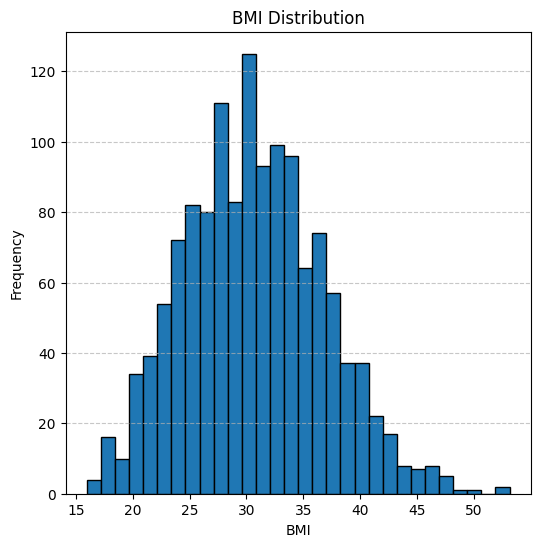

In [47]:
# plot the histogram for bmi distribution
plt.figure(figsize=(6, 6))
plt.hist(insurance_table["bmi"], bins=30, edgecolor='k')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-2650466807.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(smoker_sex_groups, labels=box_labels, patch_artist=True, boxprops={'facecolor': 'lightblue'})


Text(0, 0.5, 'Charges')

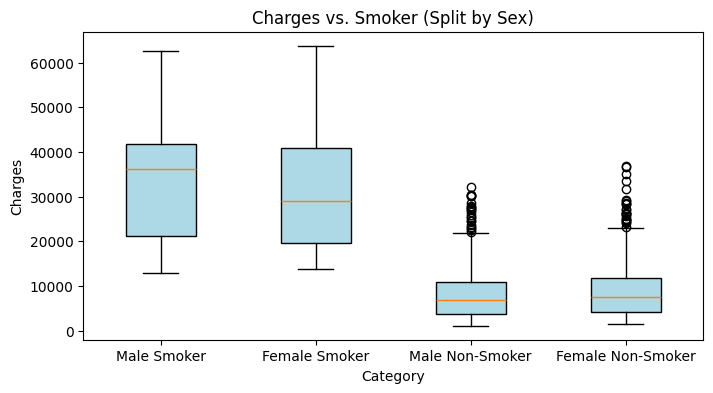

In [48]:
# boxplot stratified by two categorical variables
plt.figure(figsize=(8, 4))
smoker_sex_groups = [insurance_table[(insurance_table['smoker'] == 'yes') & (insurance_table['sex'] == 'male')]['charges'],
                     insurance_table[(insurance_table['smoker'] == 'yes') & (insurance_table['sex'] == 'female')]['charges'],
                     insurance_table[(insurance_table['smoker'] == 'no') & (insurance_table['sex'] == 'male')]['charges'],
                     insurance_table[(insurance_table['smoker'] == 'no') & (insurance_table['sex'] == 'female')]['charges']]
box_labels = ['Male Smoker', 'Female Smoker', 'Male Non-Smoker', 'Female Non-Smoker']

plt.boxplot(smoker_sex_groups, labels=box_labels, patch_artist=True, boxprops={'facecolor': 'lightblue'})
plt.title('Charges vs. Smoker (Split by Sex)')
plt.xlabel('Category')
plt.ylabel('Charges')

### Problem 1.1 (10 Points)




Let's convert the smoker variable to a dummy variable for simplicity. If smoker == yes, encode as 1; otherwise, 0.  

In Problem 1.1, we will examine the smoker group, and in Problem 1.2, we will examine the non-smoker group

In [49]:
# convert smoker to dummy variable (just run this cell)
insurance_table['smoker'] = pd.Series(np.where(insurance_table.smoker == 'yes',
                                               1, 0), insurance_table.index)
insurance_table.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


#### Problem 1.1.a

Construct a scatter plot to visualize the charges vs. smoker's bmi. Start from splitting the whole insurance data into sub-datasets based on the smoker variable. The x-axis should be `bmi` and y-axis should be `charges` for the **smokers**.




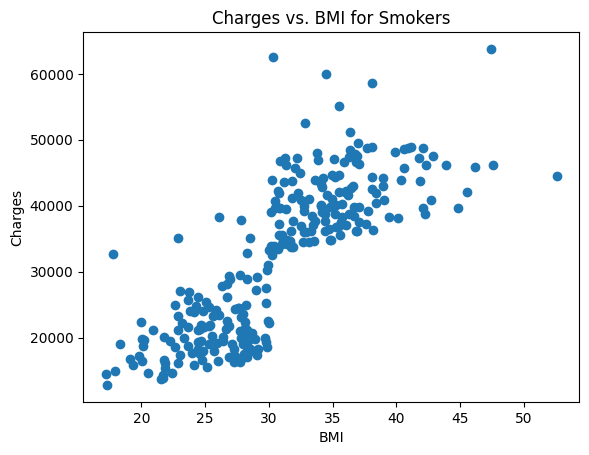

In [50]:
smokers = insurance_table[insurance_table['smoker'] == 1]
non_smokers = insurance_table[insurance_table['smoker'] == 0]
plt.scatter(smokers['bmi'], smokers['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges vs. BMI for Smokers')
plt.show()


#### Problem 1.1.b

Now, still based on the smoker sub-dataset, calculate the least-squares estimates of the coefficients for the linear model that includes a slope and an intercept:

$$\text{charges}_i = \beta_0 + \beta_1 \text{bmi}_i + \epsilon_i$$

You may either compute these values with explicit expressions, or use a package such as <code>statsmodels.api.OLS</code>. Use our demo from class as an example, if you wish.



In [51]:
import statsmodels.api as sm
x = smokers['bmi']
X = sm.add_constant(x)
y = smokers['charges']

model = sm.OLS(y, X)
results = model.fit()

beta0 = results.params['const']
beta1 = results.params['bmi']

print(f"beta0 = {beta0}")
print(f"beta1 = {beta1}")

beta0 = -13186.57632276296
beta1 = 1473.1062547014208


#### Problem 1.1.c

Now, plot the data together with the linear fit, shown as a straight line.

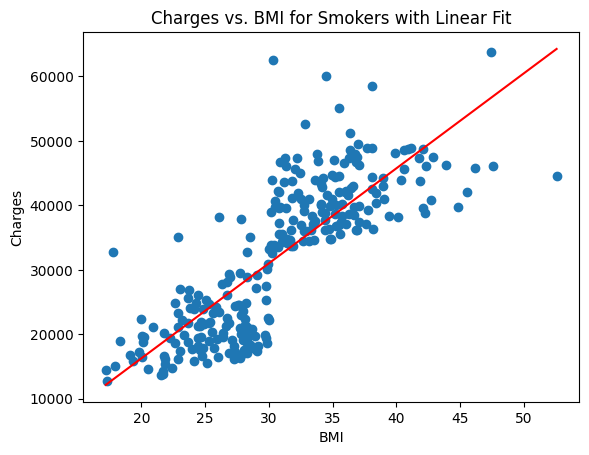

In [52]:
plt.scatter(smokers['bmi'], smokers['charges'], label = 'Data')
x_vals = np.linspace(smokers['bmi'].min(), smokers['bmi'].max(), 100)
y_vals = beta0 + beta1 * x_vals

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges vs. BMI for Smokers with Linear Fit')
plt.plot(x_vals, y_vals, color = 'red')

plt.show()

### Problem 1.2 (10 Points)

Modify the code in 1.1 to fit and visualize a linear regression model for `charges` vs. `bmi` for the **non-smokers**.

In [53]:
import statsmodels.api as sm

#### Problem 1.2.a

Visualize the data


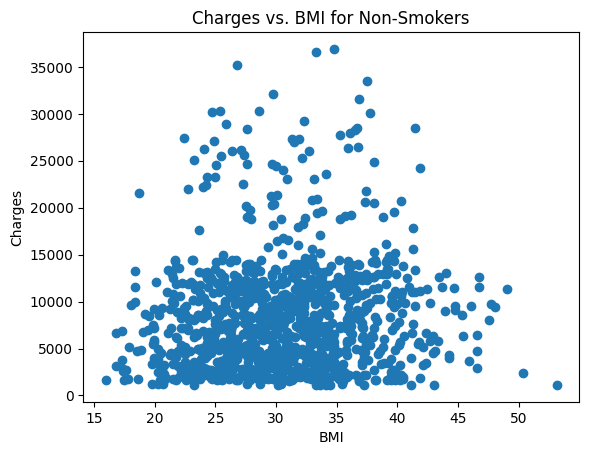

In [54]:
plt.scatter(non_smokers['bmi'], non_smokers['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges vs. BMI for Non-Smokers')
plt.show()

#### Problem 1.2.b

Compute a linear regression

In [55]:

x = non_smokers['bmi']
X = sm.add_constant(x)
y = non_smokers['charges']

model = sm.OLS(y, X)
results = model.fit()

beta0 = results.params['const']
beta1 = results.params['bmi']

print(f"beta0 = {beta0}")
print(f"beta1 = {beta1}")


beta0 = 5879.42408187297
beta1 = 83.35055766172206


#### Problem 1.2.c

Plot the data together with the linear regression here


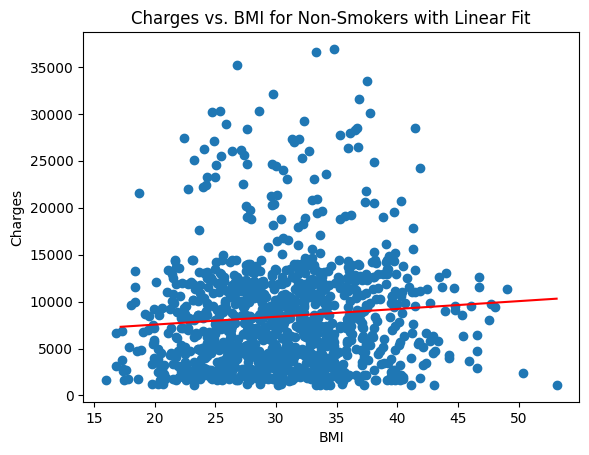

In [56]:
plt.scatter(non_smokers['bmi'], non_smokers['charges'], label = 'Data')
x_vals = np.linspace(smokers['bmi'].min(), non_smokers['bmi'].max(), 100)
y_vals = beta0 + beta1 * x_vals

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges vs. BMI for Non-Smokers with Linear Fit')
plt.plot(x_vals, y_vals, color = 'red')

plt.show()

### Problem 1.3 (5 Points)

Compare the linear regression results for 1.1 and 1.2. In which case does the model better fit the data? Please justify your answer *quantitatively*.




The linear regression fits the smoker data better than the non-smoker data. The estimated slope for smokers (B1 = 1473) is ~ 18 times larger than for non smokers (B1 = 83), indicating a substantially stronger relationship between BMI and charges. The plots show the smoker observations lie much closer to the fitted line than the non-smoker data, which exhibits large dispersion and a weak linear trend.

### Problem 1.4 (15 Points)

Now, let's conduct *multiple regression* with two models. The **first** model should be regressing the
charges onto bmi and age. And the **second** model onto bmi, age, and smoker. Thus, each of your regressions should have three/four parameters: an intercept, a coefficient for bmi, a coefficient for age, and a coefficient for smoker or not. Explore the difference between adding the smoker variable versus not adding, and describe your observations.  

In [57]:
X1 = insurance_table[['bmi', 'age']]
X1 = sm.add_constant(X1)
y = insurance_table['charges']

results1 = sm.OLS(y, X1).fit()
print(results1.summary())


X2 = insurance_table[['bmi', 'age', 'smoker']]
X2 = sm.add_constant(X2)

results2 = sm.OLS(y, X2).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           7.39e-37
Time:                        03:02:58   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6424.8046   1744.091     -3.684      0.0

Just 11.7 % of the variation in insurance charges can be explained by BMI and age alone, while 74.7 % is explained by BMI, age, and smoking status, indicating that the smoking indicator dramatially improves the model's fit. The estimated smoker coefficient is large and positive, implying a substantial increase in expected charges for smokers. I also noted that the inclusion of the smoker variable also reduced the standard error indicating more precise estimation.


## Problem 2: Romance vs. Action (60 Points)

Credit: Data 8

### Part 1. Exploring the dataset (10 Points)

In this problem, we will try to predict
a movie's genre from the text of its screenplay. We have compiled a list of 5,000 words that occur in conversations between movie characters. For each movie, our dataset tells us the frequency with which each of these words occurs in certain conversations in its screenplay. All words have been converted to lowercase.

Run the cell below to read the `movies` table. It may take up a minute or so to load.

In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import random
import math

In [59]:
movies = pd.read_csv('https://github.com/YData123/sds265-sp26/raw/main/assignments/assn1/movies.csv')
movies.head(10)

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,the avengers,action,1998,3.4,21519,3586,0.036810,0.033463,0.024819,0.029002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000279,0.0
6,natural born killers,action,1994,7.1,73047,5129,0.028271,0.047378,0.022032,0.027296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7,airplane ii: the sequel,romance,1982,5.8,15210,2328,0.027921,0.048969,0.035223,0.025773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
8,willow,romance,1988,7.1,33506,2006,0.038883,0.028913,0.030409,0.030409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9,fast times at ridgemont high,romance,1982,7.2,31710,4703,0.047629,0.027217,0.030619,0.018711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [60]:
movies.iloc[123,[0, 1, 2, 3, 4, 5, 10, 30, 5005]]

,123
Title,the matrix
Genre,action
Year,1999
Rating,8.7
# Votes,389480
# Words,3792
it,0.030327
not,0.008703
fling,0.0


The above cell prints a few columns of the row for the action movie *The Matrix*.  The movie contains 3792 words. The word "it" appears 115 times, as it makes up a fraction $\frac{115}{3792} \approx 0.030327$ of the words in the movie. The word "not" appears 33 times, as it makes up a fraction $\frac{33}{3792} \approx 0.00870253$ of the words. The word "fling" doesn't appear at all.

This numerical representation of a body of text, one that describes only the frequencies of individual words, is called a bag-of-words representation. A lot of information is discarded in this representation: the order of the words, the context of each word, who said what, the cast of characters and actors, etc. However, a bag-of-words representation is often used for machine learning applications as a reasonable starting point, because a great deal of information is also retained and expressed in a convenient and compact format. We will investigate whether this representation is sufficient to build an accurate genre classifier.

All movie titles are unique. The `row_for_title` function provides fast access to the one row for each title.

In [61]:
np.linspace(1,1001,5)

array([1.000e+00, 2.510e+02, 5.010e+02, 7.510e+02, 1.001e+03])

In [62]:
def row_for_title(title):
    """Return the row for a title

    """
    return movies[movies["Title"]==title]

For example, the fastest way to find the frequency of "hey" in the movie *The Terminator* is to access the `'hey'` item from its row. Check the original table to see if this worked for you!

In [63]:
row_for_title('the terminator')["hey"].item()

0.000540833

This dataset was extracted from [a dataset from Cornell University](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html). After transforming the dataset (e.g., converting the words to lowercase, removing profanity, and converting the counts to frequencies), this new dataset was created containing the frequency of 5000 common words in each movie.

In [64]:
print('Words with frequencies:', len(movies.drop(movies.columns[np.arange(6)],axis=1).columns))
print('Movies with genres:', len(movies))

Words with frequencies: 5000
Movies with genres: 236


**Word Stemming**

The columns other than "Title", "Genre", "Year", "Rating", "# Votes" and "# Words" in the `movies` table are all words that appear in some of the movies in our dataset.  These words have been *stemmed*, or abbreviated heuristically, in an attempt to make different [inflected](https://en.wikipedia.org/wiki/Inflection) forms of the same base word into the same string.  For example, the column "manag" is the sum of proportions of the words "manage", "manager", "managed", and "managerial" (and perhaps others) in each movie. This is a common technique used in machine learning and natural language processing.

Stemming makes it a little tricky to search for the words you want to use, so we have provided another table that will let you see examples of unstemmed versions of each stemmed word.  Run the code below to load it.

In [65]:
# Just run this cell.
vocab_mapping = pd.read_csv('https://github.com/YData123/sds265-sp26/raw/main/assignments/assn1/stem.csv')
stemmed = list(movies.drop(movies.columns[np.arange(6)],axis=1).columns)
vocab_table = vocab_mapping[vocab_mapping["Stem"].isin(stemmed)]
vocab_table = vocab_table.sort_values('Stem')
vocab_table.iloc[np.arange(2000, 2010)]


,Stem,Word
25957,coloni,colonial
10851,coloni,colony
32608,coloni,colonies
2245,coloni,colonys
12087,columbia,columbia
37766,columbia,columbias
19615,column,column
1523,column,columns
12629,com,com
38458,coma,coma


### Problem 2.1.a:

Assign `stemmed_alternating` to the stemmed version of the word "alternating".

In [66]:
stemmed_alternating = vocab_table.loc[vocab_table['Word'] == 'alternating', 'Stem'].iloc[0]
stemmed_alternating

'altern'

### Problem 2.1.b:

Assign `unstemmed_run` to an array of words in `vocab_table` that have "run" as its stemmed form.

In [90]:
# Set unstemmed_run to the unstemmed versions of "run" (which
# should be an array of string).
unstemmed_run = vocab_table.loc[vocab_table["Stem"] == "run", "Word"].values
unstemmed_run

array(['run', 'runs', 'running', 'runnings', 'runned'], dtype=object)

**Splitting the dataset**

We're going to use our `movies` dataset for two purposes.

1. First, we want to *train* a movie genre classifier.
2. Second, we want to *test* the performance of the classifier.

So, we need two different datasets: *training* and *test*.

The purpose of a classifier is to classify unseen data that is similar to the training data. Therefore, we must ensure that there are no movies that appear in both sets. We do so by splitting the dataset randomly. The dataset has already been permuted randomly, so it's easy to split.  We just take the top for training and the rest for test.

Run the code below (without changing it) to separate the datasets into two tables.

In [91]:
# Here we have defined the proportion of our data
# that we want to designate for training as 17/20ths
# of our total dataset.  3/20ths of the data is
# reserved for testing.

training_proportion = 17/20

num_movies = len(movies)
num_train = int(num_movies * training_proportion)
num_test = num_movies - num_train

train_movies = movies.iloc[np.arange(num_train)]
test_movies = movies.iloc[np.arange(num_train, num_movies)]

print("Training: ",   len(train_movies), ";",
      "Test: ",       len(test_movies))

Training:  200 ; Test:  36


### Problem 2.1.c:

Draw a horizontal bar chart with two bars that show the proportion of Action movies in each dataset.  Complete the function `action_proportion` first; it should help you create the bar chart.

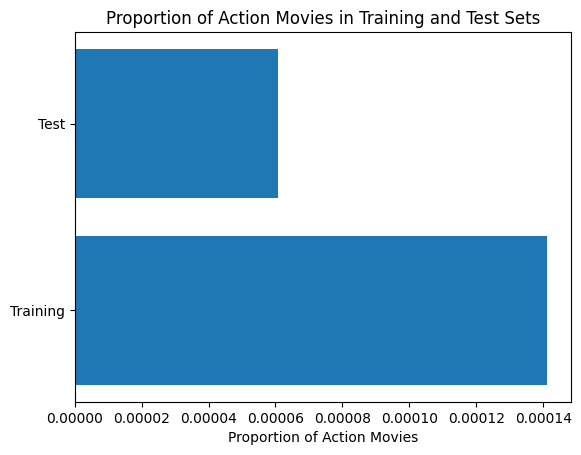

In [69]:
def action_proportion(dataframe):
    """Return the proportion of movies in a table that have the Action genre."""
    return dataframe["action"].mean()

train_action = action_proportion(train_movies)
test_action = action_proportion(test_movies)

plt.barh(["Training", "Test"], [train_action, test_action])
plt.xlabel("Proportion of Action Movies")
plt.title("Proportion of Action Movies in Training and Test Sets")
plt.show()


### Part 2. K-Nearest Neighbors: A guided example (20 Points)

k-Nearest Neighbors (k-NN) is a classification algorithm.  Given some *attributes* (also called *features*) of an unseen example, it decides whether that example belongs to one or the other of two categories based on its similarity to previously seen examples. Predicting the category of an example is called *labeling*, and the predicted category is also called a *label*.

An attribute (feature) we have about each movie is *the proportion of times a particular word appears in the movies*, and the labels are two movie genres: romance and action.  The algorithm requires many previously seen examples for which both the attributes and labels are known: that's the `train_movies` dataframe.

To build understanding, we're going to visualize the algorithm instead of just describing it.

**Classifying a movie**

In k-NN, we classify a movie by finding the `k` movies in the *training set* that are most similar according to the features we choose. We call those movies with similar features the *nearest neighbors*.  The k-NN algorithm assigns the movie to the most common category among its `k` nearest neighbors.

Let's limit ourselves to just 2 features for now, so we can plot each movie.  The features we will use are the proportions of the words "money" and "feel" in the movie.  Taking the movie "Batman Returns" (in the test set), 0.000502 of its words are "money" and 0.004016 are "feel". This movie appears in the test set, so let's imagine that we don't yet know its genre.

First, we need to make our notion of similarity more precise.  We will say that the *distance* between two movies is the straight-line distance between them when we plot their features in a scatter diagram. This distance is called the Euclidean ("yoo-KLID-ee-un") distance, whose formula is $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$.

For example, in the movie *Titanic* (in the training set), 0.0009768 of all the words in the movie are "money" and 0.0017094 are "feel".  Its distance from *Batman Returns* on this 2-word feature set is $$\sqrt{(0.000502 - 0.0009768)^2 + (0.004016 - 0.0017094)^2} \approx 0.00235496.$$  (If we included more or different features, the distance could be different.)

A third movie, *The Avengers* (in the training set), is 0 "money" and 0.001115 "feel".

The function below creates a plot to display the "money" and "feel" features of a test movie and some training movies. As you can see in the result, *Batman Returns* is more similar to *Titanic* than to *The Avengers* based on these features. However, we know that *Batman Returns* and *The Avengers* are both action movies, so intuitively we'd expect them to be more similar. Unfortunately, that isn't always the case. We'll discuss this more later.

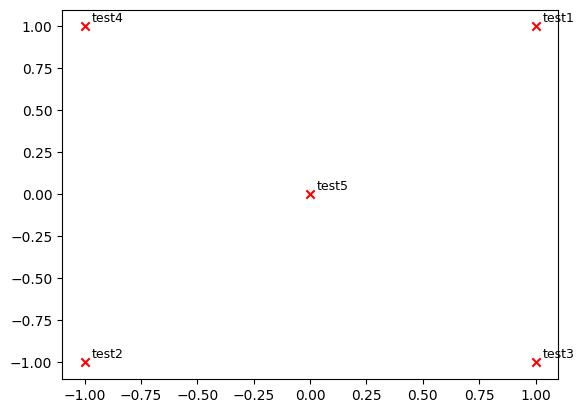

In [70]:
# Just run this cell.
def plot_embeddings(M_reduced, word2Ind, words):
    """
        Plot in a scatterplot the embeddings of the words specified in the list "words".
        Include a label next to each point.
    """
    for word in words:
        x, y = M_reduced[word2Ind[word]]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+.03, y+.03, word, fontsize=9)
    plt.show()

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

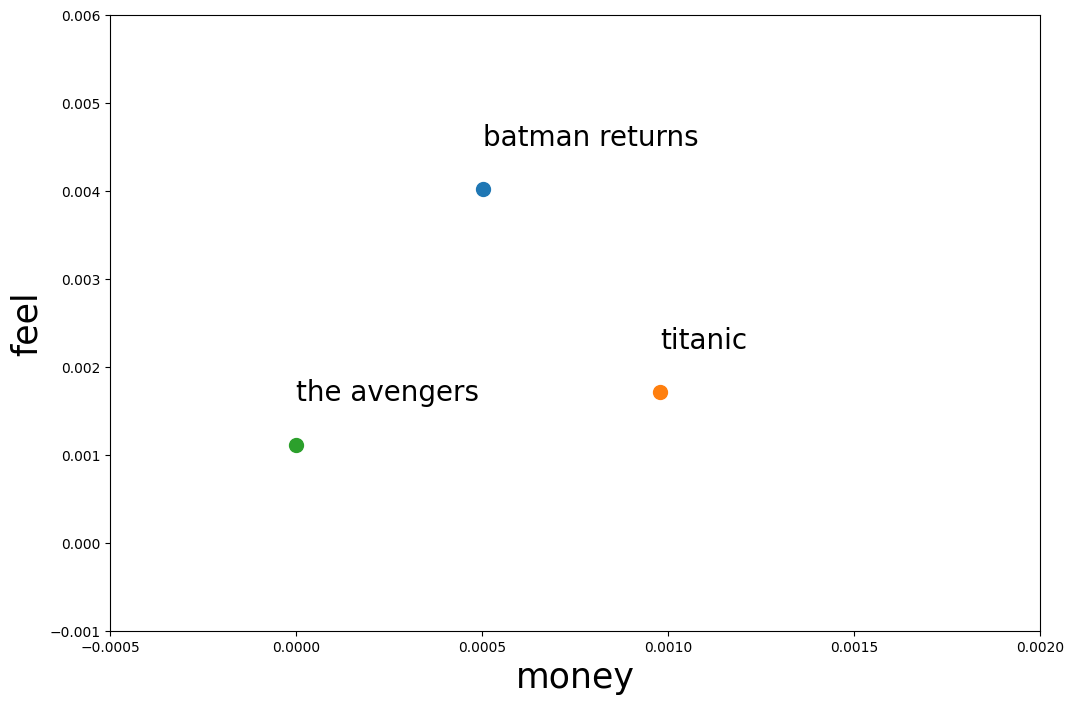

In [71]:
# Just run this cell.
def plot_with_two_features(test_movie, training_movies, x_feature, y_feature):
    """Plot a test movie and training movies using two features."""
    test_row = row_for_title(test_movie)
    test_x = test_row[x_feature].item()
    test_y = test_row[y_feature].item()
    plt.scatter(test_x, test_y, s=100)
    plt.text(test_x, test_y+.0005, test_movie, fontsize=20)
    for movie in training_movies:
        row = row_for_title(movie)
        train_x = row[x_feature].item()
        train_y = row[y_feature].item()
        plt.scatter(train_x, train_y, s=100)
        plt.text(train_x, train_y+.0005, movie, fontsize=20)
    plt.show()

plt.figure(figsize=(12, 8))
plt.xlim(-0.0005, 0.002)
plt.ylim(-0.001, 0.006)
plt.xlabel('money', fontsize=25)
plt.ylabel('feel', fontsize=25)

training = ["titanic", "the avengers"]
plot_with_two_features("batman returns", training, "money", "feel")

### Problem 2.2.a:

Compute the distance between the two action movies, *Batman Returns* and *The Avengers*, using the `money` and `feel` features only.  Assign it the name `action_distance`.

**Note:** If you have a row, you can use `item` to get a value from a column by its name.  For example, if `r` is a row, then `r["Genre"].item()` is the value in column `"Genre"` in row `r`.

*Hint*: Remember the function `row_for_title`, redefined for you below.

In [92]:
def row_for_title(title):
    """Return the row for a title

    """
    return movies[movies["Title"]==title]

In [93]:
batman = row_for_title("batman returns")
avengers = row_for_title("the avengers")
action_distance = ...
action_distance

Ellipsis

Below, we've added a third training movie, *The Terminator*. Before, the point closest to *Batman Returns* was *Titanic*, a romance movie. However, now the closest point is *The Terminator*, an action movie.

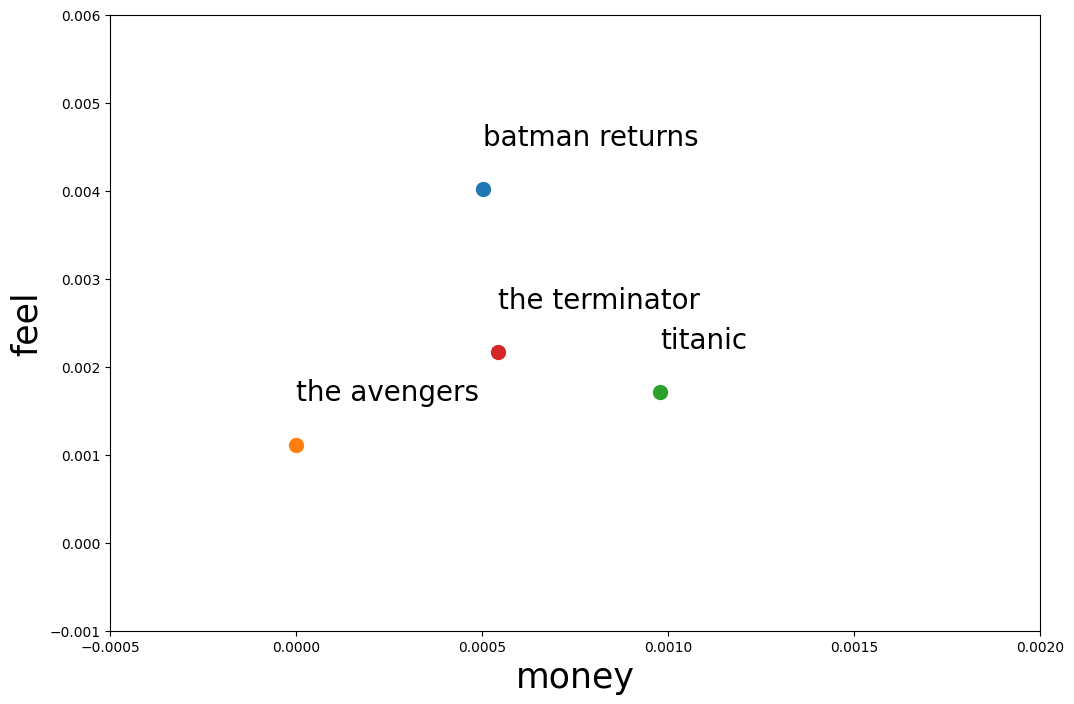

In [74]:
plt.figure(figsize=(12, 8))
plt.xlim(-0.0005, 0.002)
plt.ylim(-0.001, 0.006)
plt.xlabel('money', fontsize=25)
plt.ylabel('feel', fontsize=25)

training = ["the avengers", "titanic", "the terminator"]
plot_with_two_features("batman returns", training, "money", "feel")

### Problem 2.2.b:

Complete the function `distance_two_features` that computes the Euclidean distance between any two movies, using two features. The last two lines call your function to show that *Batman Returns* is closer to *The Terminator* than *The Avengers*.

In [95]:
def distance_two_features(title0, title1, x_feature, y_feature):
    """Compute the distance between two movies with titles title0 and title1

    Only the features named x_feature and y_feature are used when computing the distance.
    """
    row0 = row_for_title(title0)
    row1 = row_for_title(title1)

    return((row0[x_feature].item() - row1[x_feature].item())**2 + (row0[y_feature].item() - row1[y_feature].item())**2) ** 0.5

for movie in ["the terminator", "the avengers"]:
    movie_distance = distance_two_features(movie, "batman returns", "money", "feel")
    print(movie, 'distance:\t', movie_distance)

the terminator distance:	 0.0018531387547749897
the avengers distance:	 0.0029437356216700235


### Problem 2.2.c:

Define the function `distance_from_batman_returns` so that it works as described in its documentation.

**Note:** Your solution should not use arithmetic operations directly. Instead, it should make use of existing functionality above!

In [97]:
def distance_from_batman_returns(title):
    return distance_two_features(title, "batman returns", "money", "feel")

### Problem 2.2.d:

Using the features `"money"` and `"feel"`, what are the names and genres of the 7 movies in the **training set** closest to "batman returns"?  To answer this question, make a table named `close_movies` containing those 7 movies with columns `"Title"`, `"Genre"`, `"money"`, and `"feel"`, as well as a column called `"distance from batman"` that contains the distance from "batman returns".  The dataframe should be **sorted in ascending order by `distance from batman`**.

*Hint*: You may find the function [`insert`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html) useful.

In [106]:
# The sample solution took multiple lines.
...
close_movies = train_movies[["Title", "Genre", "money", "feel"]].copy()
close_movies.insert(4, "distance from batman", close_movies["Title"].apply(distance_from_batman_returns))

close_movies = close_movies.sort_values(by="distance from batman").head(7)
close_movies

,Title,Genre,money,feel,distance from batman
61,the bridges of madison county,romance,0.000565,0.004333,0.000323
199,the fisher king,romance,0.000618,0.003504,0.000525
81,broadcast news,romance,0.000137,0.003553,0.000590
24,hellboy,action,0.000000,0.003350,0.000834
120,as good as it gets,romance,0.000523,0.003139,0.000878
193,spider-man,action,0.000347,0.003126,0.000903
111,harold and maude,romance,0.000000,0.003023,0.001112


### Problem 2.2.e:

Next, we'll classify "batman returns" based on the genres of the closest movies.

To do so, define the function `most_common` so that it works as described in its documentation below.

In [111]:
def most_common(label, dataframe):
  return dataframe[label].mode().iloc[0]


# Calling most_common on your table of 7 nearest neighbors classifies
# "batman returns" as a romance movie, 5 votes to 2.
most_common('Genre', close_movies)

'romance'

Congratulations, you've classified your first movie! However, we can see that the classifier doesn't work too well since it categorized *Batman Returns* as a romance movie. Let's see if we can do better!

### Part 3. Features (20 Points)

Now, we're going to extend our classifier to consider more than two features at a time.

Euclidean distance still makes sense with more than two features. For `n` different features, we compute the difference between corresponding feature values for two movies, square each of the `n`  differences, sum up the resulting numbers, and take the square root of the sum.

### Problem 2.3.a:

Write a function to compute the Euclidean distance between two **arrays** of features of *arbitrary* (but equal) length.  Use it to compute the distance between the first movie in the training set and the first movie in the test set, *using all of the features*.  (Remember that the first six columns of your tables are not features.)

**Note:** To convert rows to arrays, use `np.array`. For example, if `df` was a dataframe, `np.array(df.iloc[i])` converts row i of `df` into an array.

In [117]:
def distance(features1, features2):
    features1 = np.array(features1, dtype=float)
    features2 = np.array(features2, dtype = float)
    return np.sqrt(np.sum((features1 - features2) **2))


distance_first_to_first = distance(np.array(train_movies.iloc[0, 6:]), np.array(test_movies.iloc[0, 6:]))
distance_first_to_first

np.float64(0.04220354922538658)

**Creating your own feature set**

Unfortunately, using all of the features has some downsides.  One clear downside is *computational* -- computing Euclidean distances just takes a long time when we have lots of features.  You might have noticed that in the last question!

So we're going to select just 20.  We'd like to choose features that are very *discriminative*. That is, features which lead us to correctly classify as much of the test set as possible.  This process of choosing features that will make a classifier work well is sometimes called *feature selection*, or more broadly *feature engineering*.

### Problem 2.3.b:

In this question, we will help you get started on selecting more effective features for distinguishing romance from action movies. The plot below (generated for you) shows the average number of times each word occurs in a romance movie on the horizontal axis and the average number of times it occurs in an action movie on the vertical axis.

![alt text](https://github.com/YData123/sds265-sp26/raw/main/assignments/assn1/word_plot.png "Title")

### Problem 2.3.c:

Using the plot above, choose 20 common words that you think might let you distinguish between romance and action movies. Make sure to choose words that are frequent enough that every movie contains at least one of them. Don't just choose the 20 most frequent, though... you can do much better.

You might want to come back to this question later to improve your list, once you've seen how to evaluate your classifier.

In [145]:
# Set my_20_features to a list of 20 features (strings that are column labels)

my_20_features = [
    "emerg", "system", "case", "power", "hide", "shot", "danger", "cop", "shield", "war", "command",
    "nice", "wife", "happi", "coupl", "home", "marri", "date", "beauti", "care", "miss"]


train_20 = train_movies[my_20_features]
test_20 = test_movies[my_20_features]

In two sentences or less, describe how you selected your features.

I tried to pick words somewhat further from the diagonal so that they appear more frequently in either action or romance.




Next, let's classify the first movie from our test set using these features.  You can examine the movie by running the cells below. Do you think it will be classified correctly?

In [146]:
print("Movie:")
print(test_movies.iloc[0,[0,1]])
print("Features:")
print(test_20.iloc[0])

Movie:
Title    the mummy
Genre       action
Name: 200, dtype: object
Features:
emerg      0.000000
system     0.000000
case       0.000000
power      0.000000
hide       0.000000
shot       0.000321
danger     0.000000
cop        0.000000
shield     0.000000
war        0.000000
command    0.000321
nice       0.000321
wife       0.000000
happi      0.000000
coupl      0.000321
home       0.000000
marri      0.000321
date       0.000000
beauti     0.000000
care       0.000321
miss       0.000963
Name: 200, dtype: float64


The mummy is an action movie, though most of the nonzero features are romance leaning words that i picked (care, miss, marri, coupl, nice). Its nearest neighbors are likely romance movies, so it will likely misclassify this movie as romance.

As before, we want to look for the movies in the training set that are most like our test movie.  We will calculate the Euclidean distances from the test movie (using the 20 selected features) to all movies in the training set.  You could do this with a `for` loop, but to make it computationally faster, we have provided a function, `fast_distances`, to do this for you.  Read its documentation to make sure you understand what it does.  (You don't need to understand the code in its body unless you want to.)

In [147]:
# Just run this cell to define fast_distances.

def fast_distances(test_row, train_dataframe):
    """An array of the distances between test_row and each row in train_rows.

    Takes 2 arguments:
      test_row: A row of a table containing features of one
        test movie (e.g., test_20.iloc[0]).
      train_table: A table of features (for example, the whole
        table train_20)."""
    assert len(train_dataframe.columns) < 50, "Make sure you're not using all the features of the movies table."
    counts_matrix = np.asmatrix(train_20.values)
    diff = np.tile(test_row.values, [counts_matrix.shape[0], 1]) - counts_matrix
    np.random.seed(0) # For tie breaking purposes
    distances = np.squeeze(np.asarray(np.sqrt(np.square(diff).sum(1))))
    eps = np.random.uniform(size=distances.shape)*1e-10 #Noise for tie break
    distances = distances + eps
    return distances

### Problem 2.3.d:

Use the `fast_distances` function provided above to compute the distance from the first movie in the test set to all the movies in the training set, **using your set of 20 features**.  Make a new dataframe called `genre_and_distances` with one row for each movie in the training set and three columns:
* The `"Title"` of the training movie
* The `"Genre"` of the training movie
* The `"Distance"` from the first movie in the test set

Ensure that `genre_and_distances` is **sorted in increasing order by distance to the first test movie**.

*Hint*: You may find the function [`sort_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) useful.

In [148]:
genre_and_distances = train_movies[["Title", "Genre"]].copy()
genre_and_distances["Distance"] = fast_distances(test_20.iloc[0], train_20)
genre_and_distances = genre_and_distances.sort_values("Distance")
genre_and_distances

,Title,Genre,Distance
17,catwoman,action,0.000903
118,mission: impossible,action,0.000953
92,the lost son,romance,0.001002
27,titanic,romance,0.001201
196,tremors,action,0.001230
...,...,...,...
33,demolition man,action,0.006557
136,moonstruck,romance,0.008416
95,quantum project,romance,0.008750
110,the jazz singer,romance,0.012254


### Problem 2.3.e:

Now compute the 5-nearest neighbors classification of the first movie in the test set.  That is, decide on its genre by finding the most common genre among its 5 nearest neighbors in the training set, according to the distances you've calculated.  Then check whether your classifier chose the right genre.  (Depending on the features you chose, your classifier might not get this movie right, and that's okay.)

In [162]:
# Set my_assigned_genre to the most common genre among these.
my_assigned_genre = genre_and_distances.head(5)["Genre"].mode().iloc[0]


# Set my_assigned_genre_was_correct to True if my_assigned_genre
# matches the actual genre of the first movie in the test set.
my_assigned_genre_was_correct = (my_assigned_genre == test_movies.iloc[0]["Genre"])

print("The assigned genre, {}, was{}correct.".format(my_assigned_genre, " " if my_assigned_genre_was_correct else " not "))

The assigned genre, action, was correct.


**A classifier function**

Now we can write a single function that encapsulates the whole process of classification.

### Problem 2.3.f:

Write a function called `classify`.  It should take the following four arguments:
* A row of features for a movie to classify (e.g., `test_20.iloc[0]`).
* A table with a column for each feature (e.g., `train_20`).
* An array of classes that has as many items as the previous table has rows, and in the same order.
* `k`, the number of neighbors to use in classification.

It should return the class a `k`-nearest neighbor classifier picks for the given row of features (the string `'Romance'` or the string `'Action'`).

*Hint:* You may find [`Counter().most_common()`](https://docs.python.org/3/library/collections.html#collections.Counter) helpful for finding the classification result.

In [174]:
from collections import Counter
def classify(test_row, train_rows, train_labels, k):
    """Return the most common class among k nearest neighbors to test_row."""
    distances = fast_distances(test_row, train_rows)
    genre_and_distances = Counter(train_labels[distances.argsort()[:k]])
    return genre_and_distances.most_common(1)[0][0]

### Problem 2.3.g:

Assign `king_kong_genre` to the genre predicted by your classifier for the movie "king kong" in the test set, using **11 neighbors** and using your 20 features.

In [175]:
# The sample solution first defined a row called king_kong_features.
king_kong_features = test_20.loc[test_movies["Title"] == "king kong"].iloc[0]
king_kong_genre = classify(king_kong_features, train_20, train_movies["Genre"], 11)
king_kong_genre

'action'

Finally, when we evaluate our classifier, it will be useful to have a classification function that is specialized to use a fixed training set and a fixed value of `k`.

### Problem 2.3.h:

Create a classification function that takes as its argument a row containing your 20 features and classifies that row using the 11-nearest neighbors algorithm with `train_20` as its training set.

In [176]:
def classify_feature_row(row):
    return classify(row, train_20, train_movies["Genre"], 11)

# When you're done, this should produce 'Romance' or 'Action'.
classify_feature_row(test_20.iloc[0])

'romance'

### Part 4: Evaluating your classifier (10 Points)

Now that it's easy to use the classifier, let's see how accurate it is on the whole test set.

### Problem 2.4.a:

Use `classify_feature_row` and [`pandas.DataFrame.apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) (or a loop) to classify every movie in the test set.  Assign these guesses as an array to `test_guesses`.  **Then**, compute the proportion of correct classifications.

In [177]:
test_guesses = test_20.apply(classify_feature_row, axis=1).values
proportion_correct = np.mean(test_guesses == test_movies["Genre"].values)
proportion_correct

np.float64(0.6388888888888888)

### Problem 2.4.b:

An important part of evaluating your classifiers is figuring out where they make mistakes. Assign the name `test_movie_correctness` to a dataframe with three columns, `'Title'`, `'Genre'`, and `'Was correct'`. The last column should contain `True` or `False` depending on whether or not the movie was classified correctly.

In [180]:
test_movie_correctness = test_movies[["Title", "Genre"]].copy()

test_movie_correctness["Was correct"] = test_guesses == test_movies["Genre"]

test_movie_correctness
#test_movie_correctness.sort_values('Was correct')

,Title,Genre,Was correct
200,the mummy,action,False
201,x-men,action,True
202,men in black,action,False
203,witness,romance,False
204,the bourne supremacy,action,True
205,sleepless in seattle,romance,True
206,king kong,action,True
207,body of evidence,romance,False
208,the hudsucker proxy,romance,True
209,badlands,romance,False


### Problem 2.4.c:

Do you see a pattern in the mistakes that your classifier makes? In two sentences or less, describe any patterns you see in the results or any other interesting findings from the table above. If you need some help, try looking up the movies that your classifier got wrong on Wikipedia.

I think one of the possible reasons my classifer made so many mistakes is that many movies (including the ones that were false) blend action and romance elements. I think that action movies often have romance aspects, though romance movies don't often have action aspects. Thus it made sense when action movies were more consistently classified correctly. Words can be misleading when genres overlap.

At this point, you've gone through one cycle of classifier design.  Let's summarize the steps:
1. From available data, select test and training sets.
2. Choose an algorithm you're going to use for classification.
3. Identify some features.
4. Define a classifier function using your features and the training set.
5. Evaluate its performance (the proportion of correct classifications) on the test set.